<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [6]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [7]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a webpage
import pandas as pd

Download the webpage at the url


In [8]:
#your code goes here
# get the contents of the webpage in text format and store in a variable called data
data = requests.get(url).text 

Create a soup object


In [9]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

Scrape the `Language name` and `annual average salary`.


In [10]:
#your code goes here
# Find the table
table = soup.find('table')

# Prepare a list to collect rows
rows_list = []

# Loop through each row in the table (skip header)
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    language_name = cols[1].getText()
    annual_average_salary = cols[3].getText()
    print(f"Language name = {language_name} and Annual average salary = {annual_average_salary}")
    rows_list.append({'Language name': language_name, 'annual average salary': annual_average_salary})

# Convert list of dicts to DataFrame
table_df = pd.DataFrame(rows_list)

# Show DataFrame
print("\n✅ Final DataFrame:")
print(table_df)

Language name = Python and Annual average salary = $114,383
Language name = Java and Annual average salary = $101,013
Language name = R and Annual average salary = $92,037
Language name = Javascript and Annual average salary = $110,981
Language name = Swift and Annual average salary = $130,801
Language name = C++ and Annual average salary = $113,865
Language name = C# and Annual average salary = $88,726
Language name = PHP and Annual average salary = $84,727
Language name = SQL and Annual average salary = $84,793
Language name = Go and Annual average salary = $94,082

✅ Final DataFrame:
  Language name annual average salary
0        Python              $114,383
1          Java              $101,013
2             R               $92,037
3    Javascript              $110,981
4         Swift              $130,801
5           C++              $113,865
6            C#               $88,726
7           PHP               $84,727
8           SQL               $84,793
9            Go           

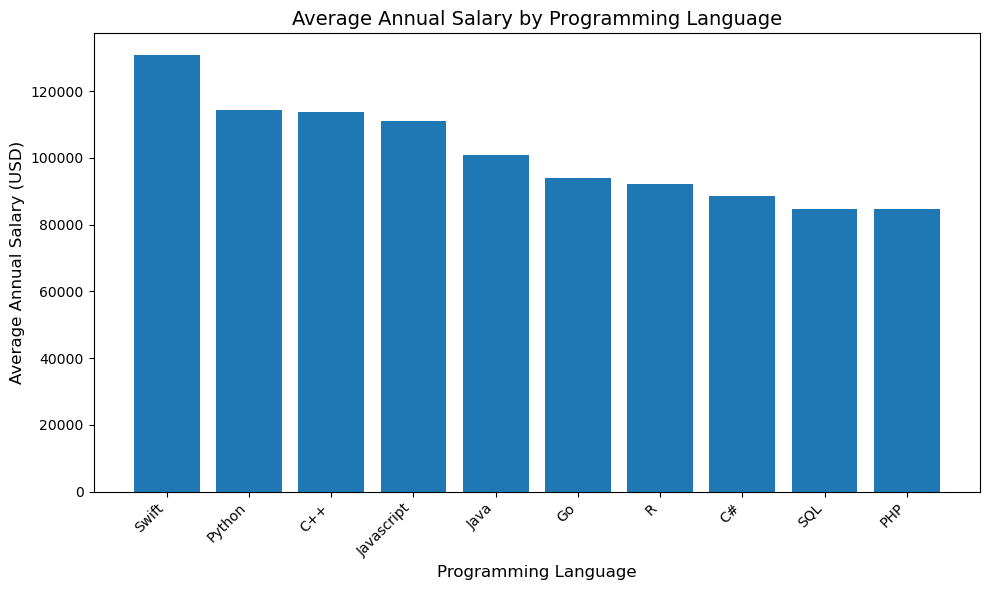

In [11]:
import matplotlib.pyplot as plt

# Clean the 'annual average salary' column: remove $ and commas, convert to int
table_df['annual average salary'] = (
    table_df['annual average salary']
    .replace({'\$':'', ',':''}, regex=True)
    .astype(int)
)

# Sort the DataFrame by salary in descending order
table_df = table_df.sort_values(by='annual average salary', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(table_df['Language name'], table_df['annual average salary'])

# Add titles and labels
plt.title('Average Annual Salary by Programming Language', fontsize=14)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Average Annual Salary (USD)', fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

Save the scrapped data into a file named *popular-languages.csv*


In [11]:
# your code goes here
df = pd.DataFrame(table_df, columns=['Language name','Annual average salary'])
df.drop(df.index[0], inplace=True)
df.to_csv('popular-languages.csv')
df

,Language name,Annual average salary
1,Python,NaN
2,Java,NaN
3,R,NaN
4,Javascript,NaN
5,Swift,NaN
6,C++,NaN
7,C#,NaN
8,PHP,NaN
9,SQL,NaN
10,Go,NaN


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
